In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
#Loading the dataset

In [3]:
iris.shape #inspecting the shape of iris dataset

(150, 5)

In [4]:
iris.head().style.format("{:.12}").background_gradient(cmap=plt.get_cmap('GnBu'),axis=0) #the first 5 rows are displayed in order to familiarize with the dataset
#uneori da eroare la format si in loc de 12 pun 2f

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print('The dataset has {} rows and {} columns.'.format(iris.shape[0],iris.shape[1]))

The dataset has 150 rows and 5 columns.


In [6]:
#The first 4 columns describe the main flower's features (sepal and petal width and length), the last columns provides the flower's species.

In [7]:
iris.isnull().sum() #Are there missing values?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.duplicated().sum()

3

There are no null values in the dataset.

There are 3 duplicate entries. I am dropping them.

In [9]:
iris = iris.drop_duplicates()

iris.shape

(147, 5)

In [10]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [11]:
iris['species'].value_counts() #counting how many values are for "species"

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

There are three species of iris flowers. Let's see what are their relative fractions in the dataset.

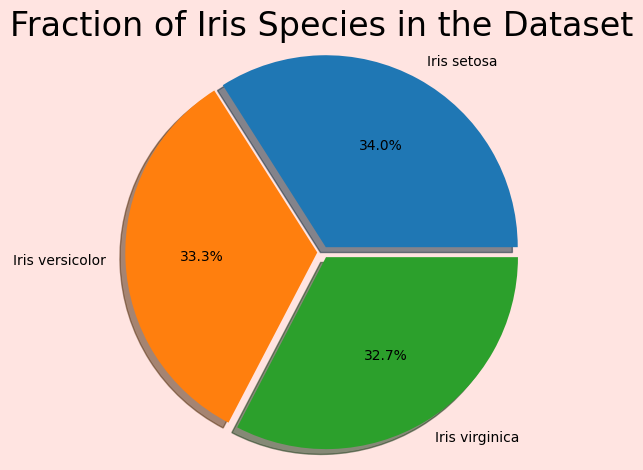

In [12]:
val=iris.species.value_counts()
plt.pie(val,labels=['Iris setosa','Iris versicolor','Iris virginica'],autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03))
plt.axis('equal')
plt.title('Fraction of Iris Species in the Dataset',fontsize=24)

plt.tight_layout()
plt.gcf().patch.set_facecolor('mistyrose')

I also learned about Violin Plorts: they combine aspects of box plots and KDE plots to provide more insight into the data distribution. Box plots - Box plots show the distribution of data and highlight the presence of any outliers while KDE - Kernel Density Estimation plots show the distribution of data points for each feature (looks like a Gaussian function)
Therefore, let's also plot the variable distributions by means of violin plots.
Link for understanding how to interpret violin plots: https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1

<Figure size 1000x700 with 0 Axes>

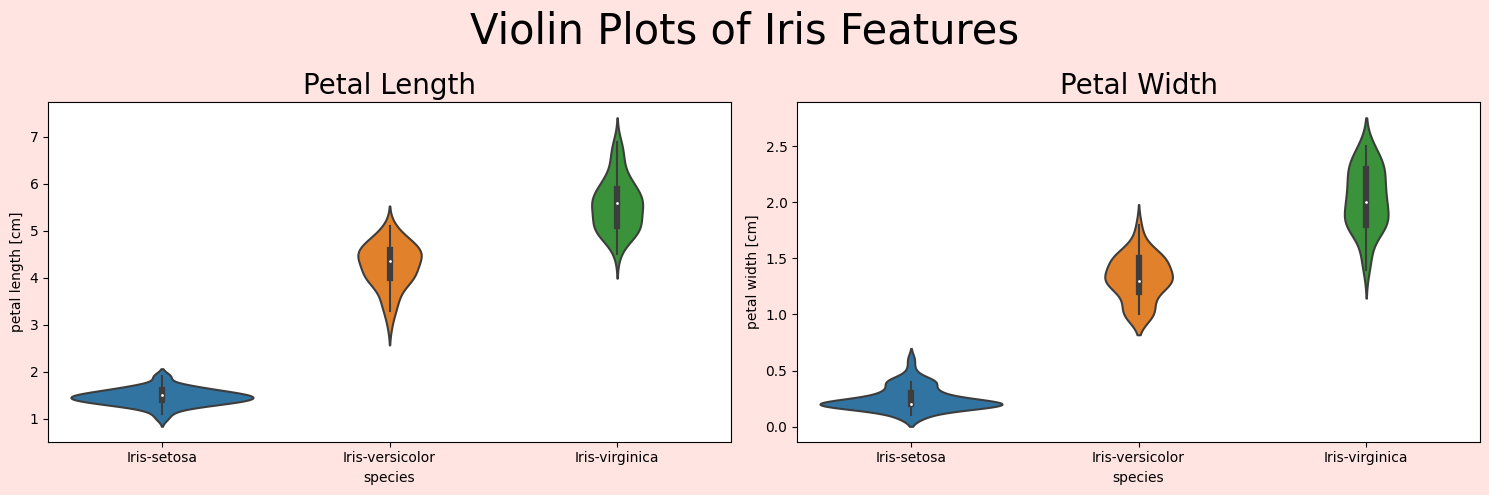

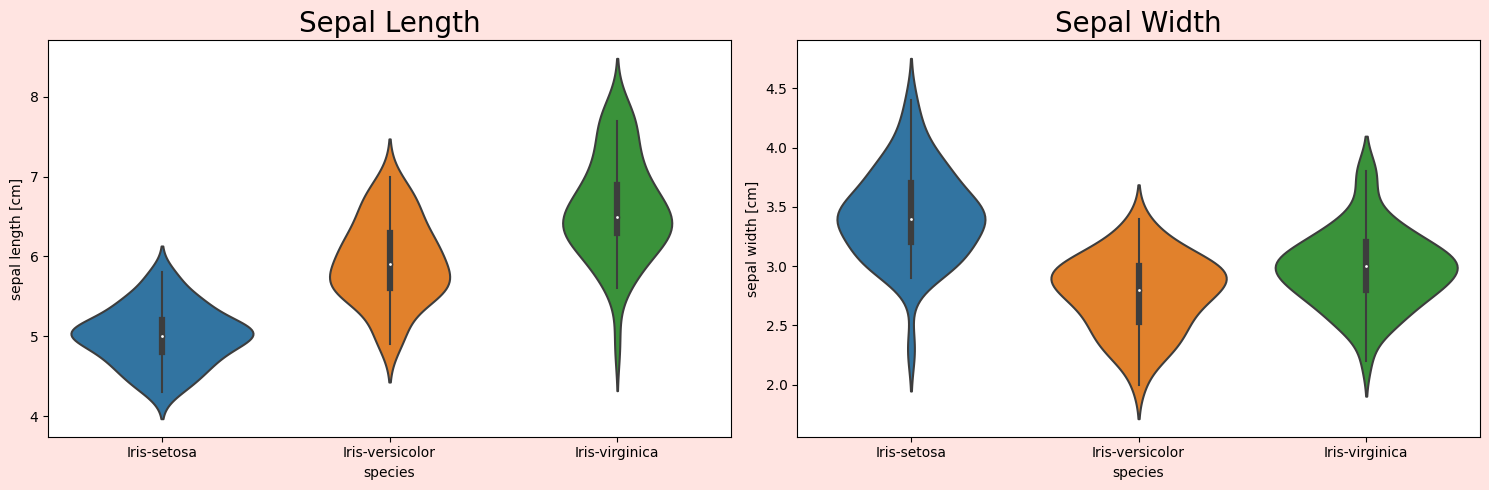

In [13]:
fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,5));
axes[0] = sns.violinplot(x='species',y='petal_length',data=iris,ax=axes[0])
axes[0].set_title('Petal Length',fontsize=20);
axes[0].set_ylabel('petal length [cm]')
axes[1] = sns.violinplot(x='species',y='petal_width',data=iris,ax=axes[1])
axes[1].set_title('Petal Width',fontsize=20);
axes[1].set_ylabel('petal width [cm]')

fig.suptitle("Violin Plots of Iris Features",fontsize=30)
fig.set_facecolor('mistyrose')
plt.tight_layout()

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,5));
axes[0] = sns.violinplot(x='species',y='sepal_length',data=iris,ax=axes[0])
axes[0].set_title('Sepal Length',fontsize=20);
axes[0].set_ylabel('sepal length [cm]')
axes[1] = sns.violinplot(x='species',y='sepal_width',data=iris,ax=axes[1])
axes[1].set_title('Sepal Width',fontsize=20)
axes[1].set_ylabel('sepal width [cm]')

fig.set_facecolor('mistyrose')
plt.tight_layout()

plt.tight_layout()
plt.show()

Now, I want to see the relationship between the variables.

<Figure size 1000x1000 with 0 Axes>

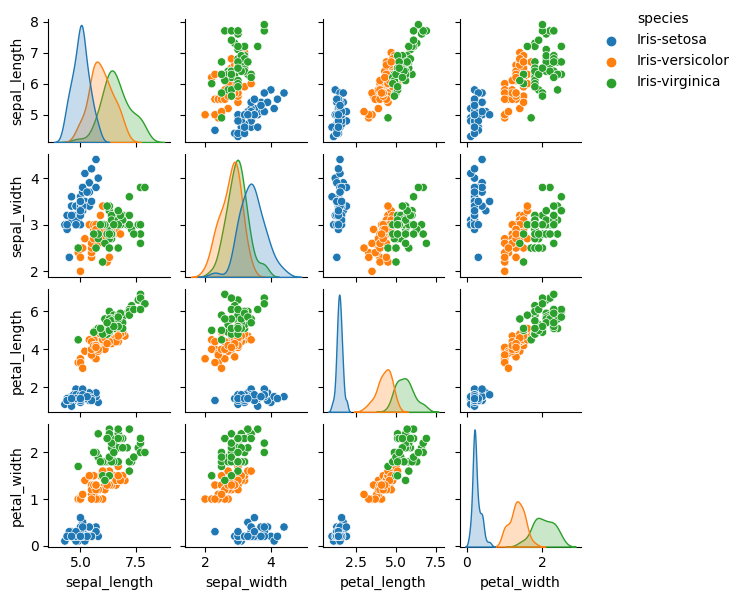

In [14]:
# Here, I had some errors but the plots can still be visualised with this commented code. 
#sns.set_style("whitegrid")
#sns.pairplot(iris,hue="species",height=3);

#plt.gcf().patch.set_facecolor('mistyrose')
#plt.show() 
#visualization without errors
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

plt.figure(figsize=(10,10))
pairplot=sns.pairplot(data=iris,hue="species",height=1.5)
sns.move_legend(pairplot,loc="upper right")
plt.show()

In [15]:
iris.describe().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('Purples'),axis=0)

,sepal_length,sepal_width,petal_length,petal_width
count,147.0,147.0,147.0,147.0
mean,5.856,3.056,3.78,1.209
std,0.8291,0.437,1.759,0.7579
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


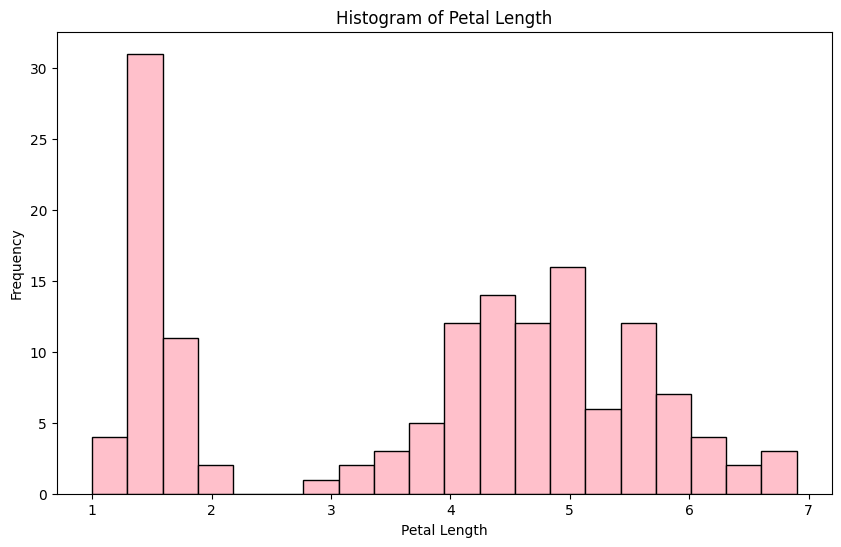

In [16]:
# Creating a histogram for petal_length
color = ['pink']
plt.figure(figsize=(10, 6))
plt.hist(iris['petal_length'], bins=20, edgecolor='black', color = color)
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

In [17]:
iris.groupby('species').mean() #Group by species and calculate the mean of each feature

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

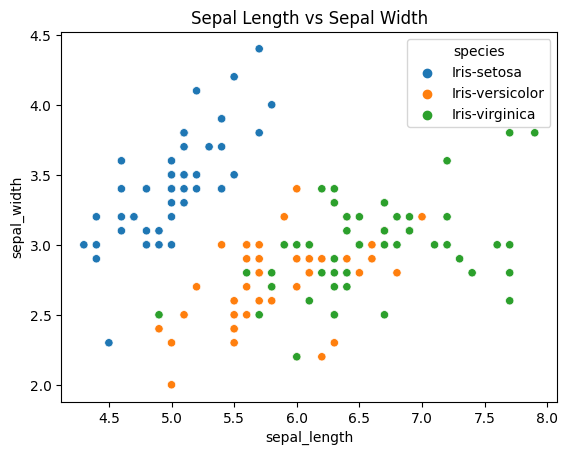

In [18]:
#Visualizations:
# Sepal = leaf structure
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width')

One observation here is that the sepal length has a negligible one with the sepal width. This linear dependence can be observed if we draw the regression line.

Text(0.5, 1.0, 'Petal Length vs Petal Width')

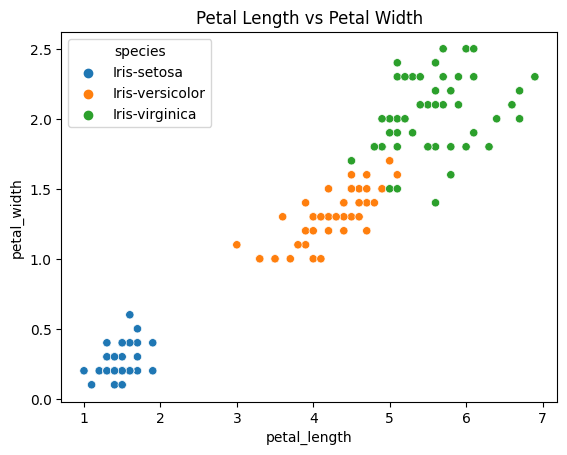

In [19]:
# Patel = flower part
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs Petal Width')

In [20]:
#Correlation Coefficient Analysis

In [21]:
iris['species'] = iris['species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [22]:
iris.corr() #calc corell matrix

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


In [23]:
type(iris.corr())

pandas.core.frame.DataFrame

In [24]:
iris.corr()['species']

sepal_length    0.782904
sepal_width    -0.418348
petal_length    0.948339
petal_width     0.955693
species         1.000000
Name: species, dtype: float64

In [25]:
iris.corr()['species'].drop('species') #Drop the 'species' column and keep only other features

sepal_length    0.782904
sepal_width    -0.418348
petal_length    0.948339
petal_width     0.955693
Name: species, dtype: float64

In [26]:
#one can observe that the petal length and petal width have a stronger dependency on species compared to sepal length and sepal width.

In [27]:
# Compute the correlation matrix for heatmap
#this way when I plot I have a smaller no of values than if I used iris
corr = iris.corr()

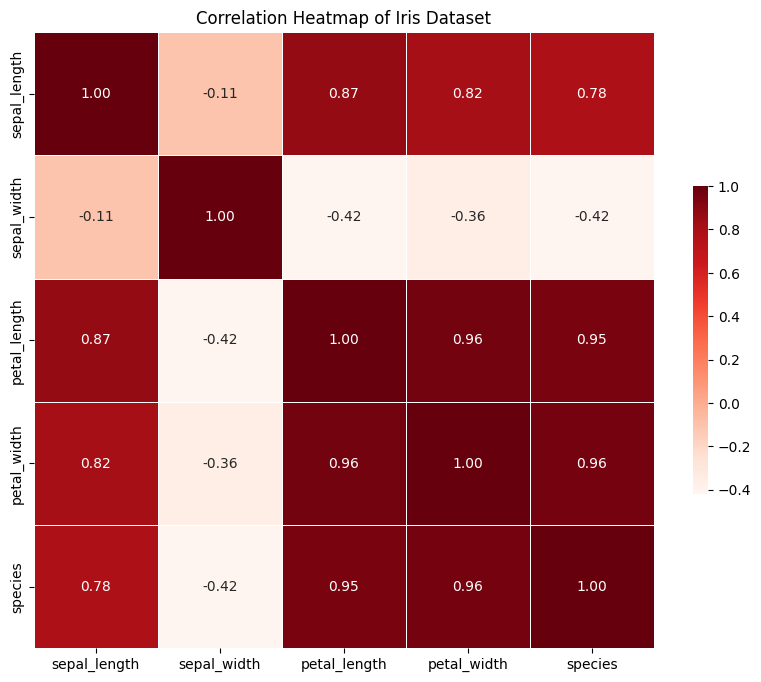

In [28]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()


In [29]:
iris_df = iris.drop(columns='sepal_width', axis=1)

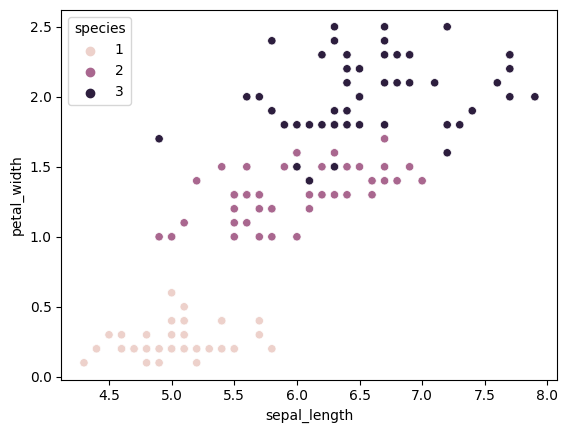

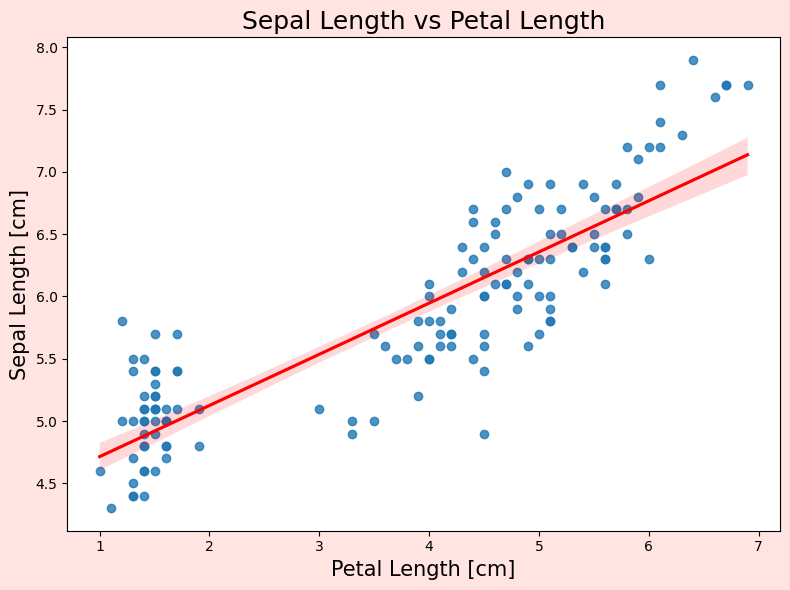

In [30]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_width', hue='species')
# Create a figure and axes in order to plot the relationship between the
#iris sepal length and petal length for example. This can be done with other features too
fig, (ax1) = plt.subplots(1,figsize=(8, 6))
# Scatter plot with regression line
sns.regplot(ax=ax1, data=iris, x='petal_length', y='sepal_length', line_kws={'color':'r'})
ax1.set_xlabel('Petal Length [cm]', fontsize=15)
ax1.set_ylabel('Sepal Length [cm]', fontsize=15)
ax1.set_title('Sepal Length vs Petal Length', fontsize=18)
fig.set_facecolor('mistyrose')
# Show the plot
plt.tight_layout()
plt.show()

As shown above, the sepal length has a strong linear relationship with both the petal width and length.

In [31]:
iris_df.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1


Now that we classified the iris flowers, we can move on Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
#Splitting the data into features and target for Model Biulding
X = iris_df.drop(columns='species', axis=1)
y = iris_df['species']

In [34]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2, stratify=y)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132, 3) (15, 3) (132,) (15,)


In [36]:
#Next, I initialized and trained a Decision Tree Classifier - is used to predict species.

In [37]:
decision_model = DecisionTreeClassifier()

In [38]:
decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
#accuracy Score Prediction using Decision Tree Classification
#there are also other decision making like logistic regression

In [40]:
#Predict and calculate accuracy on the training set
y_train_tree_predicted = decision_model.predict(X_train)
acc1 = accuracy_score(y_train, y_train_tree_predicted)
acc1

1.0

In [41]:
#Predict and calculate accuracy on the other set (test)
y_test_tree_predicted = decision_model.predict(X_test)
acc2 = accuracy_score(y_test, y_test_tree_predicted)
print("Test Accuracy:", acc2)
# Output predicted species
print("Predicted Species for Test Data:")
for i, pred in enumerate(y_test_tree_predicted):
    print(f"Sample {i + 1}: Predicted Species - {pred}, Actual Species - {y_test.iloc[i]}")


Test Accuracy: 0.9333333333333333
Predicted Species for Test Data:
Sample 1: Predicted Species - 1, Actual Species - 1
Sample 2: Predicted Species - 2, Actual Species - 2
Sample 3: Predicted Species - 2, Actual Species - 2
Sample 4: Predicted Species - 3, Actual Species - 3
Sample 5: Predicted Species - 1, Actual Species - 1
Sample 6: Predicted Species - 2, Actual Species - 2
Sample 7: Predicted Species - 3, Actual Species - 3
Sample 8: Predicted Species - 1, Actual Species - 1
Sample 9: Predicted Species - 3, Actual Species - 3
Sample 10: Predicted Species - 2, Actual Species - 2
Sample 11: Predicted Species - 1, Actual Species - 1
Sample 12: Predicted Species - 3, Actual Species - 3
Sample 13: Predicted Species - 2, Actual Species - 2
Sample 14: Predicted Species - 2, Actual Species - 3
Sample 15: Predicted Species - 1, Actual Species - 1


Now I am using sklearn.linear_model to perform a regression analysis on sepal lengths to test these observations.

In [42]:
from sklearn.linear_model import LinearRegression 
#X = imputed_iris[['sepal_width','petal_length','petal_width']]
X = iris[['sepal_width','petal_length','petal_width']]
#y = imputed_iris['sepal_length']
y = iris['sepal_length']
regr = LinearRegression() 
regr.fit(X,y) 

print(regr.score(X,y))

0.8580799670250183


Now i defined some parameters that I will use further for the Random Forest Classifier

In [43]:
features=iris.drop("species",axis=1)
target=iris['species']

In [44]:
from sklearn.model_selection import train_test_split
w_train,w_test,z_train,z_test=train_test_split(features,target,test_size=0.3,random_state=42)

Random Forest is an ensemble method that builds multiple decision trees and merges them to get more accurate and stable predictions. It reduces overfitting and improves accuracy compared to a single decision tree.

In [45]:
import numpy as np

# Check for any NaN or infinite values in w_train and z_train
print(np.isnan(w_train).sum())
print(np.isinf(w_train).sum())
print(np.isnan(z_train).sum())
print(np.isinf(z_train).sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
0
0


This is good news, as it means that the data should not have issues related to missing or infinite values that could affect the model training process.
Now we can proceed with the Classifier implementation.

In [46]:
#Varianta 1 - nu merge pe jupyter
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

parameters={"criterion":['gini','entropy'],
            
            "max_depth":[1,2,3,4,5],
            "min_samples_split":[3,5,7,9],
            "max_features":["sqrt","log2"],
            "n_estimators":[20,40,60,80,100]}
model=RandomForestClassifier()
tuning=GridSearchCV(model,param_grid=parameters,cv=5,scoring='accuracy')
tuning.fit(w_train,z_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [20, 40, 60, 80, 100]},
             scoring='accuracy')

In [47]:
print("Best Parameters:", tuning.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 40}


In [48]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
train_pred=tuning.predict(w_train)
test_pred=tuning.predict(w_test)

In [49]:
train_accuracy=accuracy_score(train_pred,z_train)
print("Training Accuracy- ",train_accuracy.round(2))

Training Accuracy-  0.96


In [58]:
#V2 - merge bine si pe jupyter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Parameter grid specific to RandomForestClassifier
parameters = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [3, 5, 7, 9],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [20, 40, 60, 80, 100]
}

model = RandomForestClassifier()
tuning = GridSearchCV(model, param_grid=parameters, cv=5, scoring='accuracy')

tuning.fit(w_train, z_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [20, 40, 60, 80, 100]},
             scoring='accuracy')

In [59]:
print("Best Parameters:", tuning.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 7, 'n_estimators': 20}


In [60]:
train_pred=tuning.predict(w_train)
test_pred=tuning.predict(w_test)

In [61]:
train_accuracy = accuracy_score(train_pred, z_train)
test_accuracy = accuracy_score(test_pred, z_test)
print("Training Accuracy: ", round(train_accuracy, 2))
print("Test Accuracy: ", round(test_accuracy, 2))

print("Predicted Species for Test Data:")
for i, pred in enumerate(test_pred):
    if i < len(y_test):  # Ensure index is within bounds
        print(f"Sample {i + 1}: Predicted Species - {pred}, Actual Species - {y_test.iloc[i]}")

Training Accuracy:  0.99
Test Accuracy:  0.96
Predicted Species for Test Data:
Sample 1: Predicted Species - 3, Actual Species - 1
Sample 2: Predicted Species - 2, Actual Species - 2
Sample 3: Predicted Species - 3, Actual Species - 2
Sample 4: Predicted Species - 1, Actual Species - 3
Sample 5: Predicted Species - 2, Actual Species - 1
Sample 6: Predicted Species - 1, Actual Species - 2
Sample 7: Predicted Species - 2, Actual Species - 3
Sample 8: Predicted Species - 1, Actual Species - 1
Sample 9: Predicted Species - 3, Actual Species - 3
Sample 10: Predicted Species - 1, Actual Species - 2
Sample 11: Predicted Species - 1, Actual Species - 1
Sample 12: Predicted Species - 2, Actual Species - 3
Sample 13: Predicted Species - 3, Actual Species - 2
Sample 14: Predicted Species - 2, Actual Species - 3
Sample 15: Predicted Species - 3, Actual Species - 1
